In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load data
data = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
# clean the data
data = data.dropna(axis=0, how='any')  # drop rows with any missing values
data = data.drop_duplicates()  # drop duplicate rows

In [4]:
# handle missing values
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer()
data[num_columns] = imputer.fit_transform(data[num_columns])

In [5]:
# encode categorical data
cat_columns = data.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ct = ColumnTransformer(transformers=[('encoder', ohe, cat_columns)], remainder='passthrough')
df = pd.DataFrame(ct.fit_transform(data))

In [6]:
# Divide the data into features and labels
X = data.drop('condition', axis=1)
y = data['condition']

In [7]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the classifier algorithms
classifiers = {'Logistic Regression': LogisticRegression(),
              'Decision Tree': DecisionTreeClassifier(),
              'Random Forest': RandomForestClassifier(),
              'SVM': SVC()}

In [10]:
# Train and evaluate the classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

In [11]:
# Plot the results
for name, accuracy in results.items():
    print(f'{name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.5316265060240963
Decision Tree Accuracy: 0.5067771084337349
Random Forest Accuracy: 0.5353915662650602
SVM Accuracy: 0.5210843373493976


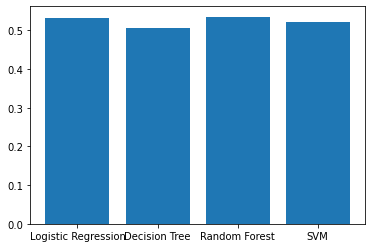

In [13]:
# Plot the results
plt.bar(results.keys(), results.values())
plt.show()

In [12]:
# Find the best model
best_model_name = max(results, key=results.get)
best_model = classifiers[best_model_name]

In [14]:
# Save the best model as a pickle file
pickle.dump(best_model, open('best_model.pkl', 'wb'))